<a href="https://colab.research.google.com/github/dinesh-2000/GRIP-TSF-Internship/blob/main/TASK_7_Stock_Market_Prediction_using_Numerical_and_Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **The Sparks Foundation || GRIP_APRIL-21**


---



### **Data Science and Business Analytics**
**TASK 7 -Stock Market Prediction using Numerical and Textual Analysis**

**Author : Dinesh Kumar C**

Objective: Create a hybrid model for stock price/performance 
prediction using numerical analysis of historical stock prices, and 
sentimental analysis of news headlines 

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

● Download historical stock prices from finance.yahoo.com

● Download textual (news) data from https://bit.ly/36fFPI6 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io
  
#plotly imports
import plotly as py
import plotly.graph_objs as go
import plotly.express as px


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sensex_df = pd.read_csv('/content/drive/MyDrive/data/s&p bse sensex data (2).csv',parse_dates=['Date'])
sensex_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-18,1485.25,1489.75,1462.25,1467.50,1467.50,104794.0
1,2000-09-19,1467.00,1482.75,1466.75,1478.50,1478.50,103371.0
2,2000-09-20,1478.75,1480.50,1450.25,1469.50,1469.50,109667.0
3,2000-09-21,1470.25,1474.00,1455.50,1469.50,1469.50,98528.0
4,2000-09-22,1454.75,1471.00,1436.75,1468.50,1468.50,97416.0
...,...,...,...,...,...,...,...
5231,2021-04-02,4014.50,4038.00,4010.00,4010.00,4010.00,64747.0
5232,2021-04-05,4030.00,4073.75,4021.00,4067.75,4067.75,1250666.0
5233,2021-04-06,4069.75,4076.00,4052.25,4064.00,4064.00,1252163.0
5234,2021-04-07,4067.00,4075.50,4056.50,4070.00,4070.00,1101579.0


In [4]:
100 * sensex_df.isnull().sum() / len(sensex_df)


Date         0.000000
Open         1.413293
High         1.413293
Low          1.413293
Close        1.413293
Adj Close    1.413293
Volume       1.413293
dtype: float64

In [5]:
sensex_df.fillna(method='bfill',inplace=True)

In [6]:
fig = px.line(sensex_df, x='Date', y='Open',title='SENSEX (S&P BSE SENSEX) Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [7]:

fig = px.line(sensex_df, x='Date', y='High',title='SENSEX (S&P BSE SENSEX) Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

fig = px.line(sensex_df, x='Date', y='Low',title='SENSEX (S&P BSE SENSEX) Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

fig = px.line(sensex_df, x='Date', y='Close',title='SENSEX (S&P BSE SENSEX) Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [8]:
fig = px.line(sensex_df, x='Date', y='Volume',
              
              title='SENSEX (S&P BSE SENSEX) - VOLUME')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [9]:
news_data = pd.read_csv('/content/drive/MyDrive/data/india-news-headlines.csv')


In [10]:
news_data

,publish_date,headline_category,headline_text
0,20200101,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; M...
1,20200101,city.bhubaneswar,Bone-chilling cold wavecontinues to sweep state
2,20200101,city.hyderabad,T gained 163 sq km forest cover
3,20200101,city.hyderabad,Draft electoral rolls published
4,20200101,city.kochi,Invasive species increasing in Kerala's core f...
...,...,...,...
182604,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
182605,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
182606,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
182607,20201231,removed,Govt extends deadline for use of FASTag till F...


In [11]:
# Checking for null values in India news headlines Data
100 * news_data.isnull().sum() / len(news_data)

publish_date         0.0
headline_category    0.0
headline_text        0.0
dtype: float64

# **Predicting the Sentiments by Un-Supervised method**
1. Preprocess the headlines to remove the punctuations, stop words and lemmatise the words. Save this pre processed headlines in clean_headlines.csv file 

2. Train the CBOW (Continous Bag Of Words) model to create word embeddings of size 300. After training, each word is represented by 300 dimension vector. Hence, The vocabulary of whole headline corpus is in 300 Dimensions. Save the model as 'word2vec.model' 

3. Using K means clustering, create two clusters. This way, all the words in 300 Dimensions, would be divided into 2 Cluster based on spatial similarity. 

4. Determine the sentiment coefficient for each word in headline corpus. The sentiment coefficient is determined by 

  1. closeness score, which is score of closeness of a datapoint from their own cluster centroids and 

  2. cluster value, which is 1 or -1 based on if the cluster is positive or negative cluster 

5. Create a dictionary of Sentiment Coefficient for each words. 

6. Determine the TF-IDF value of each word and create the dictionary IF-IDF for each word 

7. Replace the words in sentence with TF-IDF value from the above dictionary, to get the TF-IDF vector of the sentence. 

8. Replace the words in sentence with sentiment coefficients created above, from Sentiment Coefficient dictionary to create another vector. 

9. Take the dot product of both vectors to determine the sentiment rate. If the sentiment rate is positive, then sentiment is overall positive, otherwise, it is negatve

In [12]:
#Import for NLP
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os.path
import pickle


from tqdm import tqdm
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.cluster import KMeans


from gensim.models import Word2Vec
import multiprocessing
from time import time 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
headlines = list(news_data.headline_text.values)

In [14]:
#Pre-processing news headlines

def preprocess_headlines(headlines):
    if not os.path.isfile('preprocessed_headlines.pkl'):
        preprocessed_headlines = []
        for headline in tqdm(headlines):
            # make every token into lower case words
            tokens = word_tokenize(headline)
            tokens = [token.lower() for token in tokens]

            # Remove punctuation if any
            table = str.maketrans("","",string.punctuation)
            stripped = [w.translate(table) for w in tokens ]
            words = [word for word in stripped if word.isalpha()]

            # Remove Stop words
            stop_words = set(stopwords.words('english'))
            words = [word for word in words if word not in stop_words]
            wordnet_lemmatizer = WordNetLemmatizer()
            lemmatized_words = [wordnet_lemmatizer.lemmatize(i,'v') for i in words]
            preprocessed_headlines.append(lemmatized_words)
        print('Headlines Preprocessed! Saving the preprocessed headlines...')
        with open('preprocessed_headlines.pkl', 'wb') as f:
            pickle.dump(preprocessed_headlines, f)
            
        print('Preprocessed Headline saved for use later')
    else:
        print('Opening saved preprocessed headlines')
        with open('preprocessed_headlines.pkl', 'rb') as f:
            preprocessed_headlines = pickle.load(f)
            
    return preprocessed_headlines

In [15]:
preprocessed_headlines = preprocess_headlines(headlines)
#time to take 20 minutes

Opening saved preprocessed headlines


In [16]:
#Opening saved preprocessed headlines
#Save the cleaned headlines
cleaned_headlines = pd.DataFrame([' '.join(sent) for sent in preprocessed_headlines])
cleaned_headlines.columns = ['headlines']
cleaned_headlines.to_csv('clean_headlines.csv')

In [17]:
 
#Create and Train Word2Vec Model
#Create the model
 
# I used gensim’s implementation of word2vec algorithm with CBOW architecture. 
# I trained 300 dimensional embeddings with lookup window equal to 4, negative sampling was set to 20 words,
# sub-sampling to 1e-5, and learning rate decayed from 0.03 to 0.0007.
 
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     size=300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)
 
start = time()
 
w2v_model.build_vocab(preprocessed_headlines, progress_per=50000)
 
print('Time to build vocab: {} mins'.format(round((time() - start) / 60, 2)))
 
 
#Time to build vocab: 0.32 mins

Time to build vocab: 0.08 mins


In [18]:
start = time()
 
w2v_model.train(preprocessed_headlines, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
 
print('Time to train the model: {} mins'.format(round((time() - start) / 60, 2)))
 
w2v_model.init_sims(replace=True)

Time to train the model: 7.1 mins


In [19]:
#Save the word2vec model
 
w2v_model.save("word2vec.model")

In [20]:
#Use K Mean model to create positive and negative clusters from word vectors
 
word_vectors = Word2Vec.load("word2vec.model").wv

In [21]:
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [22]:
#Divide the whole vector space into positive and negative clusters
 
positive_cluster_index = 1
positive_cluster_center = model.cluster_centers_[positive_cluster_index]
negative_cluster_center = model.cluster_centers_[1-positive_cluster_index]

In [23]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

In [24]:
#Determine the Sentiment score of each word based on closeness with its cluster

# The sentiment coefficient is calculated using closeness scores and cluster values
# Cluster values are 1 for positive cluster and -1 for negative cluster 
# The closeness score is the score to determine how close a word vector is, to the center of its own cluster

words['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [25]:

words.drop(['cluster'],axis=1,inplace=True)
words.head()

,words,vectors,cluster_value,closeness_score,sentiment_coeff
0,happy,"[0.025533814, 0.012101012, -0.041158214, -0.06...",1,1.059759,1.059759
1,new,"[-0.0284833, -0.010033702, 0.039739102, -0.021...",-1,1.013407,-1.013407
2,year,"[0.030961994, -0.0038691058, 0.00921679, -0.07...",-1,0.999161,-0.999161
3,image,"[-0.04076173, 0.004289118, -0.109798424, -0.05...",1,1.006540,1.006540
4,quote,"[0.014039411, -0.03172259, -0.08428603, -0.021...",1,1.097030,1.097030


In [26]:
# Saving the words (vocabulary) and their sentiment coefficients
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)

In [27]:
#Determine the TF-IDF score of each word

tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(cleaned_headlines.headlines)
features = pd.Series(tfidf.get_feature_names())
transformed = tfidf.transform(cleaned_headlines.headlines)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [28]:
#Create a dictionary of TF-IDF of each word and replace each word in sentence with TF-IDF score

def create_tfidf_dictionary(x, transformed_file, features):
    '''
    create dictionary for each input sentence x, where each word has assigned its tfidf score
    
    inspired  by function from this wonderful article: 
    https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
    
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer

    '''
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    '''
    replacing each word with it's calculated tfidf dictionary with scores of each word
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer
    '''
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.headlines.split()))

In [29]:
%%time
replaced_tfidf_scores = cleaned_headlines.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)#this step takes around 10 minutes to calculate
#Wall time: 10min 36s

CPU times: user 59.9 s, sys: 2.02 s, total: 1min 1s
Wall time: 59.4 s


In [71]:
#Replace each word in sentence with sentiment coefficients

def replace_sentiment_words(word, sentiment_dict):
    '''
    replacing each word with its associated sentiment score from sentiment dict
    '''
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [31]:
sentiment_map = pd.read_csv('sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))


In [32]:

replaced_closeness_scores = cleaned_headlines.headlines.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))


In [33]:

replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, cleaned_headlines.headlines]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence']

In [34]:
#Predict Sentiment

# At this point of time, we have two vectors of sentences:
# 1. Vector from the sentiment coefficients of each word
# 2. Vector from the TF-IDF score of each word
# We have to take the dot product of these vector to determine the sentiment rate.
# If the sentiment rate is positive => Sentiment = POSITIVE
# If the sentiment rate is negative => Sentiment = NEGATIVE

replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate>0).astype('int8')
replacement_df['sentiment'] = [1 if i==1 else 0 for i in replacement_df.prediction]


In [35]:

replacement_df.head()

,sentiment_coeff,tfidf_scores,sentence,sentiment_rate,prediction,sentiment
0,"[1.059758937065223, -1.0134072528637763, -0.99...","[7.613849799611353, 4.480843147154005, 5.76845...",happy new year image quote wish message card g...,64.781049,1,1
1,"[-1.0557803407388695, -1.0282041512285165, 0, ...","[11.50567009772198, 7.601679263991097, 12.4219...",bonechilling cold wavecontinues sweep state,-34.073041,0,0
2,"[-1.003881211869586, -1.024491149787674, -1.00...","[8.15928095255482, 10.070585572432657, 8.67245...",gain sq km forest cover,-41.277334,0,0
3,"[-1.029441155205927, -1.00971068183726, -1.015...","[8.23230608756971, 9.126123963591805, 7.554426...",draft electoral roll publish,-35.025254,0,0
4,"[-1.0584779486295564, -1.031854568437766, -1.0...","[10.812522917162035, 8.49998749331482, 6.78360...",invasive species increase kerala core forest a...,-56.076295,0,0


In [36]:
news_data['Sentiment Prediction'] = replacement_df.sentiment


In [37]:

mapper = {0:'Negative',1:'Positive'}
news_data['Overall Predicted Sentiment'] = news_data['Sentiment Prediction'].map(mapper)
news_data


,publish_date,headline_category,headline_text,Sentiment Prediction,Overall Predicted Sentiment
0,20200101,life-style.events,Happy New Year 2020: Images; Quotes; Wishes; M...,1,Positive
1,20200101,city.bhubaneswar,Bone-chilling cold wavecontinues to sweep state,0,Negative
2,20200101,city.hyderabad,T gained 163 sq km forest cover,0,Negative
3,20200101,city.hyderabad,Draft electoral rolls published,0,Negative
4,20200101,city.kochi,Invasive species increasing in Kerala's core f...,0,Negative
...,...,...,...,...,...
182604,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...,0,Negative
182605,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...,0,Negative
182606,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...,0,Negative
182607,20201231,removed,Govt extends deadline for use of FASTag till F...,0,Negative


In [38]:
# Below are sme example of the result, which is pretty satisfactory

news_data.iloc[[181456,134253,167447,154347,154673,182345,156123,137623,182303,169392],:]

,publish_date,headline_category,headline_text,Sentiment Prediction,Overall Predicted Sentiment
181456,20201229,city.goa,Teen tourist saved from drowning,0,Negative
134253,20200926,city.mangaluru,Ride planned tomorrow to show kids 10-km cycli...,0,Negative
167447,20201201,city.delhi,Three men stage road rage event to rob Fortune...,1,Positive
154347,20201105,city.chennai,Engineers of bad roads that kill people can be...,0,Negative
154673,20201105,city.patna,AIMIM-BSP alliance in Bihar to favour BJP: Con...,1,Positive
182345,20201231,city.pune,Two constables suspended,0,Negative
156123,20201108,india,Over 46;000 new cases take India's Covid tally...,0,Negative
137623,20201002,city.madurai,Woman; 21; kidnapped by gang of seven,0,Negative
182303,20201231,city.jaipur,Azharuddin; 3 others escape unhurt in mishap n...,0,Negative
169392,20201205,city.ahmedabad,After 5 auctions; ABG Shipyard assets to be so...,0,Negative


*********************** TIME SERIES ANALYSIS OF SENSEX (S&P BSE SENSEX) STOCKS***********************
## **Using Recurrent Neural Netwoks**
1. Time Forecasting for next day is done on 'Close' value for SENSEX (S&P BSE SENSEX) stocks 

2. Split the data before 31st Dec 2019. Hence, the training data is before 31st Dec 2019 and prediction will be done for year 2020 starting from 1st January 2020 

3. Normalize the Close values between value 0 and 1 for better training 

4. Prepare and Train the RNN / LSTM model 

5. Prepare the test data from the close values after 31st Dec 2019 

6. Do predictions on ab0ve prepared the test data
# **ALGORITHM 1 : Stock Prediction using RNN**

In [39]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-3x8vmfm1
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-3x8vmfm1
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0e003998c83b4073b8b8c8a257df4d9343a572423_-cp37-none-any.whl size=148933 sha256=fe7eb39f2eccdd3d6e571c54208bbf1aeb33d222831d94787d087a502408253c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pkb7ooxi/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [40]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [41]:
#Get Time Series Series Data for 'Close'

close_data = sensex_df['Close'].values
dates = sensex_df['Date'].values

In [42]:

#Split the data

from datetime import datetime

split_date = datetime(2020,12,31)



In [43]:

# Selecting the training data before 31-Dec-2017
train_df = sensex_df.loc[sensex_df['Date'] <= split_date]
train_close = train_df['Close'].values
train_dates = train_df['Date'].values
# Selecting the testing data before 31-Dec-2017
test_df = sensex_df.loc[sensex_df['Date'] > split_date]
test_close = test_df['Close'].values
test_dates = test_df['Date'].values

# **Normalize the train time-series data**

In [44]:
# Reshaping the training array to apply Standard Scaler
train_close_values = train_close.reshape(-1,1)

In [45]:
 train_close_values = train_close[:,~np.all(np.isnan(0), axis=0)]


In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_scaled = scaler.fit_transform(train_close_values)

In [47]:
# creating data structure with 30 days as input and 31'st day as output
X_train = []
y_train = []

for i in range(30,len(train_close_scaled)):
    X_train.append(train_close_scaled[i-30:i,0])
    y_train.append(train_close_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [48]:
#Reshaping data as expected by RNN model in tensorflow 2.0

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# **Prepare the RNN / LSTM model**

In [49]:
def createLSTM_model(X_train):
    regressor = Sequential()

    # Adding 4 layers on LSTM
    regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
    regressor.add(Dropout(0.2))


    regressor.add(LSTM(units=50,return_sequences=True))
    regressor.add(Dropout(0.2))


    regressor.add(LSTM(units=50,return_sequences=True))
    regressor.add(Dropout(0.2))


    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))

    # Adding output layer

    regressor.add(Dense(units=1))
    
    regressor.compile(optimizer='adam',loss='mean_squared_error')
    
    print(regressor.summary())
    
    return regressor

# **Train the RNN / LSTM Model**

In [50]:
model = createLSTM_model(X_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 30, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [51]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')

In [52]:

model.fit(X_train,y_train,epochs=100,batch_size=32,callbacks=[tfdocs.modeling.EpochDots(),early_stopping],validation_split=0.2)

Epoch 1/100
129/129 [==============================] - 18s 78ms/step - loss: 0.0111 - val_loss: 0.0018

Epoch: 0, loss:0.0036,  val_loss:0.0018,  
.Epoch 2/100
129/129 [==============================] - 8s 62ms/step - loss: 7.9533e-04 - val_loss: 0.0018
.Epoch 3/100
129/129 [==============================] - 8s 61ms/step - loss: 7.2202e-04 - val_loss: 0.0015
.Epoch 4/100
129/129 [==============================] - 8s 63ms/step - loss: 6.2765e-04 - val_loss: 0.0099
.Epoch 5/100
129/129 [==============================] - 8s 63ms/step - loss: 6.0929e-04 - val_loss: 0.0045
.Epoch 6/100
129/129 [==============================] - 8s 63ms/step - loss: 5.1730e-04 - val_loss: 0.0019
.

In [53]:
#Save the trained model¶

model.save("StockPricePrediction.h5")

In [54]:
#Prepare test data

# NOTE: The variable 'close_test_values' contains array of test data after split and 30 previous values from train data
# NOTE : The variable 'test_close' only contains the test data after the split

# This is done because, in order to predict the 1st value of test data, we need 30 previous values as training data

close_test_values = close_data[len(close_data) - len(test_close)-30:] # Contains the test data and 30 values from training data

In [55]:
# Reshaping the close_test_values (test data) to apply the Standand Scaler
close_test_values = close_test_values.reshape(-1,1)



In [56]:
inputs_scaled = scaler.transform(close_test_values)



In [57]:
X_test = []
for i in range(30,inputs_scaled.shape[0]):
    X_test.append(inputs_scaled[i-30:i,0])
X_test = np.array(X_test)



In [58]:
# Reshape the test data as expected by LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [59]:
#Predict the Stock Price of 2020 after December 2019

predicted_stock_price = model.predict(X_test)


In [60]:

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)



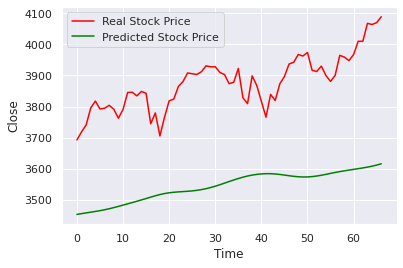

In [61]:
plt.plot(test_close,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted Stock Price')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()

# **Combined Visualisations from Stock Market and Sentiment Analysis Predictions**

In [62]:

sentiment_analysis_df = news_data.groupby(['publish_date','Overall Predicted Sentiment']).agg({'Overall Predicted Sentiment':'count'})
sentiment_analysis_df.columns = ['Count of Sentiments']



In [63]:
sentiment_analysis_df = sentiment_analysis_df.reset_index()



In [64]:
sentiment_analysis_df['publish_date'] = sentiment_analysis_df['publish_date'].apply(str).apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:]).apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))



In [65]:

sentiment_analysis_df.head()

,publish_date,Overall Predicted Sentiment,Count of Sentiments
0,2020-01-01,Negative,428
1,2020-01-01,Positive,70
2,2020-01-02,Negative,396
3,2020-01-02,Positive,103
4,2020-01-03,Negative,316


In [66]:
positive_sentiments_df = sentiment_analysis_df[sentiment_analysis_df['Overall Predicted Sentiment'] == 'Positive']


In [67]:

fig = px.line(positive_sentiments_df, x='publish_date', y='Count of Sentiments',
              
              title='Positive Sentiment Articles Trend')
fig.update_xaxes(rangeslider_visible=True)
fig.show()



In [68]:
negative_sentiments_df = sentiment_analysis_df[sentiment_analysis_df['Overall Predicted Sentiment'] == 'Negative']



In [69]:
fig = px.line(negative_sentiments_df, x='publish_date', y='Count of Sentiments',
              
              title='Negative Sentiment Articles Trend')
fig.update_xaxes(rangeslider_visible=True)
fig.show()



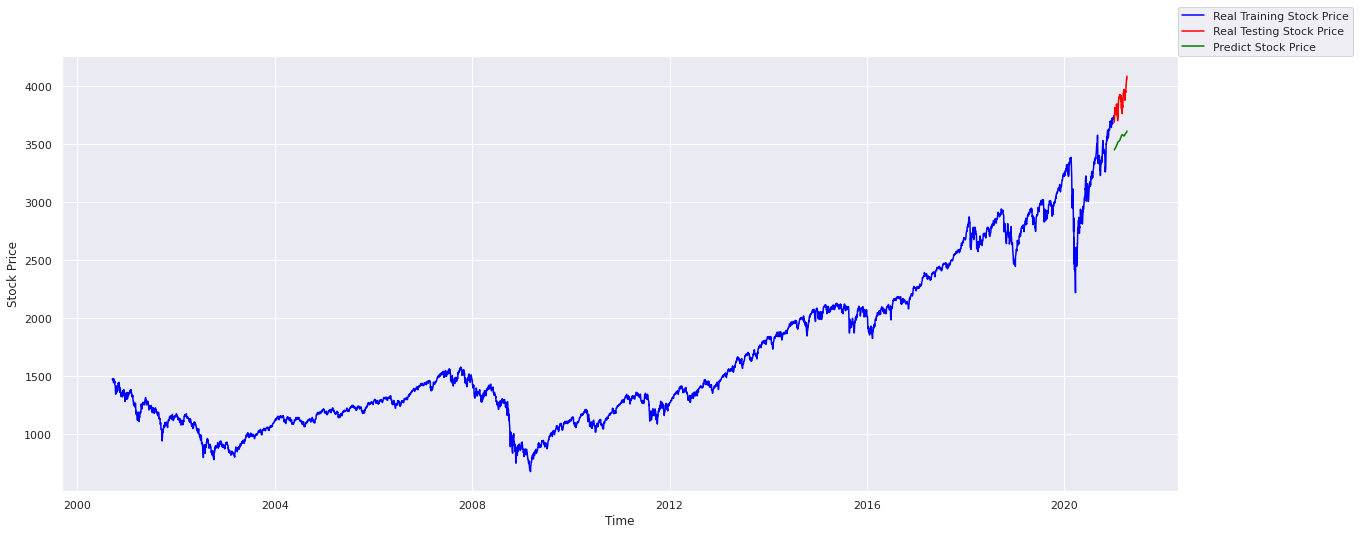

In [70]:
plt.figure(figsize=(20,8))
plt.plot(train_dates,train_close,color='blue',label='Real Training Stock Price')
plt.plot(test_dates,test_close,color='red',label='Real Testing Stock Price')
plt.plot(test_dates,predicted_stock_price,color='green',label='Predict Stock Price')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(loc=(1,1))